In [310]:
import os
import sys
import numpy as np
#sys.path.insert(0, os.path.abspath('../module-subdirectory'))
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import covid_data # ians py file in local directory
import importlib


In [311]:
# functions
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    plt.scatter(predictions, test_labels)
    plt.xlabel("prediction")
    plt.ylabel("True")
    plt.xlim(0,45)
    plt.ylim(0,45)
    print('Model Performance')
    print('Average Error: {:0.4f} days.'.format(np.mean(errors)))
    print('r2: {:0.4f}'.format(r2))
    print('MSE = {:0.2f} days.'.format(mse))    
    return r2, mse

## check which columns are numbers, set those TRUE
def is_int(val):
    try:
        num = int(val)
    except ValueError:
        return False
    return True


In [312]:
importlib.reload(covid_data)

<module 'covid_data' from 'C:\\Users\\jesse\\Documents\\COVID_ML\\covid_data.py'>

In [4]:
df_dict ={}
quant_range_dict = {}

In [5]:
covid_data.omics_id_dict.keys()

dict_keys(['proteomics', 'lipidomics', 'metabolomics', 'transcriptomics'])

In [6]:
ome_names = ['proteomics', 'lipidomics', 'metabolomics']

In [7]:
for key in ome_names:
    print(key)
    df_dict[key], quant_range_dict[key] = covid_data.get_omics_data(with_metadata=True, dataset=key)

proteomics
lipidomics
metabolomics


In [8]:
df_dict, quant_range_dict = covid_data.get_combined_data(df_dict, quant_range_dict)

In [9]:
df_dict.keys()

dict_keys(['proteomics', 'lipidomics', 'metabolomics', 'combined'])

In [10]:
df_dict["proteomics"].head()

,7593,7596,7597,7599,7600,7601,7602,7605,7606,7607,...,Vent_free_days,DM,Hospital_free_days_45,Ferritin_NG/ML,CRP_MG/L,DDIMER_mg/L_FEU,Procalcitonin_NG/ML,Lactate_MMol/L,Fibrinogen,SOFA
sample_id,,,,,,,,,,,,,,,,,,,,,
1.0,37.995543,27.176361,28.294477,24.783368,23.926601,23.490571,25.490816,29.287382,29.505121,29.909421,...,0,0,0,946,73.1,1.3,36,0.9,513,8
2.0,37.353091,29.419228,29.048510,27.573331,24.671039,22.343591,27.166913,29.576452,30.081443,29.514012,...,28,0,39,1060,,1.03,0.37,,,
3.0,37.527875,27.174171,28.953215,25.619161,24.528623,20.714471,25.589237,29.621968,29.398338,29.436129,...,28,1,18,1335,53.2,1.48,0.07,,513,
4.0,37.673128,28.879702,29.527460,23.893562,25.875326,24.170967,25.280226,30.966780,30.360452,30.041791,...,28,0,39,583,251.1,1.32,0.98,0.87,949,
5.0,37.983542,27.262485,28.605867,18.440251,20.888495,17.354782,25.654472,29.020542,29.175695,29.628988,...,23,0,27,800,355.8,0.69,4.92,1.48,929,7


In [11]:
dfc = df_dict["combined"]
X = dfc[dfc.columns[[is_int(x) for x in dfc.columns]]]

In [21]:
dfp = df_dict['proteomics']
X = dfp[dfp.columns[[is_int(x) for x in dfp.columns]]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012C2754BC40>,
      dtype=object)

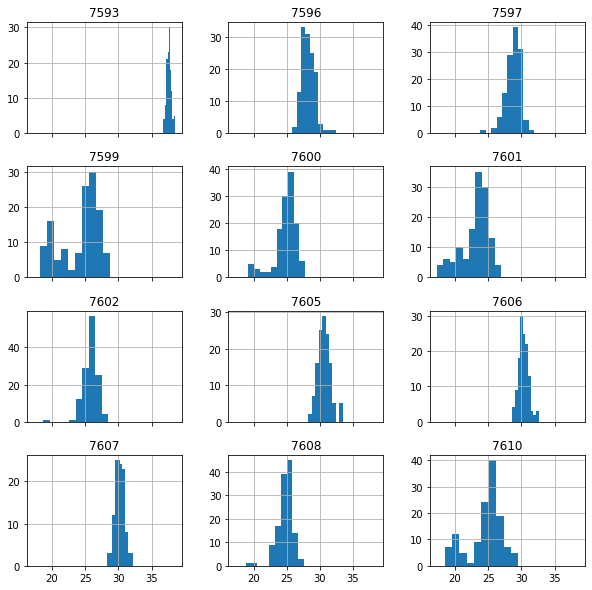

In [28]:
plt.rcParams['figure.figsize'] = 10,10
X.iloc[:,0:12].hist(sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012C27E43EE0>,
      dtype=object)

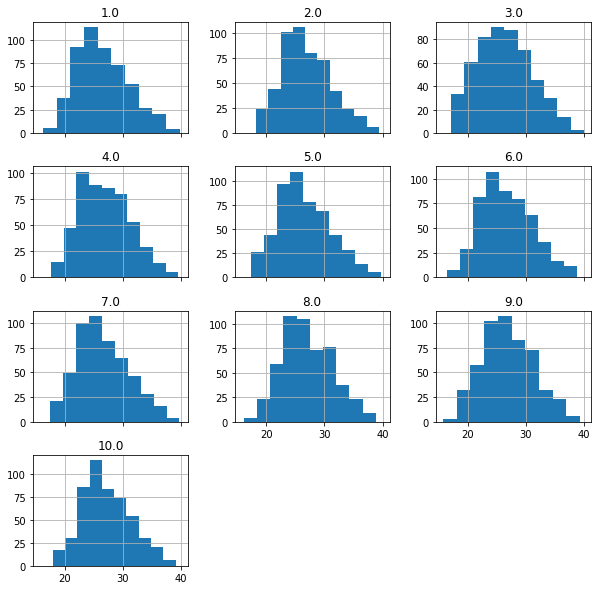

In [29]:
X.T.iloc[:,0:10].hist(sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012C27DE7FD0>,
      dtype=object)

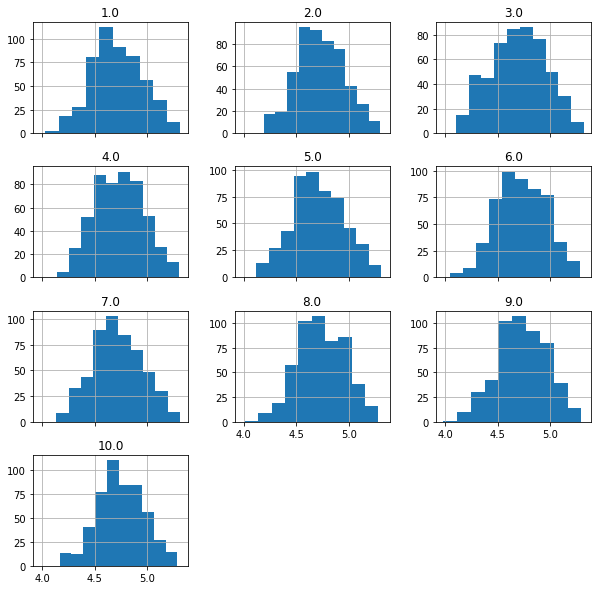

In [30]:
np.log2(X.T.iloc[:,0:10]).hist(sharex=True)

In [32]:
dfc_covid = dfc[dfc['COVID']==1]
X = dfc_covid[dfc.columns[[is_int(x) for x in dfc.columns]]]
y = dfc_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:

regr = linear_model.LinearRegression()

In [40]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_valid)

In [42]:
y_valid

sample_id
31.0      0
69.0     42
64.0     16
48.0      0
43.0      0
41.0     20
92.0      0
46.0     39
11.0     37
1.0       0
19.0     38
32.0      0
99.0      0
87.0     39
78.0     31
5.0      27
81.0      0
34.0     36
13.0     39
27.0      0
102.0     0
Name: Hospital_free_days_45, dtype: int64

Coefficients: 
 [-0.00467527  0.00533826  0.02447892 ... -0.00183349 -0.0033168
 -0.01636789]
Mean squared error: 139.41
Coefficient of determination: 0.55


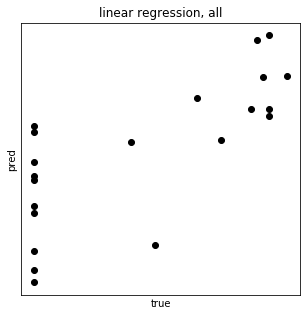

In [47]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_pred))

# Plot outputs
plt.rcParams['figure.figsize'] = 5,5
plt.scatter(y_valid, y_pred,  color='black')
#plt.plot(X_valid, y_pred, color='blue', linewidth=3)
plt.xlabel('true')
plt.ylabel('pred')
plt.title('linear regression, all')
plt.xticks(())
plt.yticks(())

plt.show()

In [48]:
rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=1, 
                           min_samples_split=2, 
                           max_features='sqrt', 
                           max_depth=None, 
                           bootstrap=False)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
y_pred_rf = rf.predict(X_valid)

In [89]:
def model_eval(model, model_name, XTRAIN, XTEST,YTRAIN, YTEST):
    model.fit(XTRAIN, YTRAIN)
    YPRED = model.predict(XTEST)
    
    print('Mean squared error: %.2f'
      % mean_squared_error(YTEST, YPRED))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(YTEST, YPRED))

    # Plot outputs
    plt.rcParams['figure.figsize'] = 5,5
    plt.scatter(YTEST, YPRED,  color='black')
    #plt.plot(X_valid, y_pred, color='blue', linewidth=3)
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.title(model_name)
    plt.xticks(())
    plt.yticks(())

    plt.show()
    return mean_squared_error(YTEST, YPRED), r2_score(YTEST, YPRED)

In [113]:
## try many models
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold

In [114]:
model_dict = {
    'extratrees': ExtraTreesRegressor(),
    'rf' : RandomForestRegressor(),
    'adaboost': AdaBoostRegressor(),
    'linear': linear_model.LinearRegression(),
    'gboost': GradientBoostingRegressor() , 
    'lasso' : Lasso(),
    'elastic': ElasticNet(),
    'ridge': Ridge()
    
}

# k-fold cross validation

In [92]:
np.asarray(X)

array([[37.99554289, 27.17636051, 28.29447674, ..., 15.16741815,
        14.05324713, 10.56985561],
       [37.35309104, 29.41922775, 29.04851028, ..., 17.5951409 ,
        17.06381637, 13.86302471],
       [37.52787482, 27.17417108, 28.95321485, ..., 15.70455212,
        14.2511865 , 11.55074679],
       ...,
       [37.06898003, 32.41540953, 28.43013858, ..., 17.12565562,
        15.93387504, 13.13249973],
       [38.00467456, 26.63699361, 28.3468033 , ..., 14.4252159 ,
        13.35810171, 10.5980525 ],
       [38.31857615, 27.79958855, 25.86114656, ..., 15.51422091,
        13.65508345, 11.79766153]])

In [101]:
xa = np.asarray(X)

In [104]:
xa[0]

array([37.99554289, 27.17636051, 28.29447674, ..., 15.16741815,
       14.05324713, 10.56985561])

In [102]:
xa[35]

array([37.80015001, 27.99512544, 28.51739493, ..., 16.836149  ,
       16.18495281, 13.33035672])

In [107]:
xa[train_index]

array([[37.35309104, 29.41922775, 29.04851028, ..., 17.5951409 ,
        17.06381637, 13.86302471],
       [37.67312772, 28.87970215, 29.52746006, ..., 15.85574448,
        15.15165083, 11.84156435],
       [37.98354217, 27.26248545, 28.60586678, ..., 16.78596325,
        15.6909801 , 13.10164745],
       ...,
       [37.78755632, 26.96906061, 28.10314571, ..., 16.60819706,
        15.47990654, 12.82376528],
       [37.06898003, 32.41540953, 28.43013858, ..., 17.12565562,
        15.93387504, 13.13249973],
       [38.00467456, 26.63699361, 28.3468033 , ..., 14.4252159 ,
        13.35810171, 10.5980525 ]])

In [110]:
ya = np.asarray(y)

{'extratrees': None,
 'rf': None,
 'adaboost': None,
 'linear': None,
 'gboost': None,
 'lasso': None,
 'elastic': None,
 'ridge': None}

In [124]:
mse = {}
mse = mse.fromkeys(model_dict.keys(),[])

In [125]:
mse

{'extratrees': [],
 'rf': [],
 'adaboost': [],
 'linear': [],
 'gboost': [],
 'lasso': [],
 'elastic': [],
 'ridge': []}

In [134]:
from collections import defaultdict


fold=0
TRAIN: [  1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  29  32  34  35  36  38  39  40  41  43  44
  45  46  47  48  51  52  53  56  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  74  77  78  79  80  81  82  84  85  87  88  89  90
  92  93  94  95  96  97  98  99 100] TEST: [  0   2  12  22  30  31  33  37  42  49  50  54  55  57  73  75  76  83
  86  91 101]
Mean squared error: 181.58
Coefficient of determination: 0.36


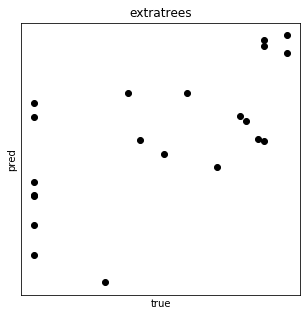

181.57926666666668
0.3620524163094916
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668]})
Mean squared error: 213.82
Coefficient of determination: 0.25


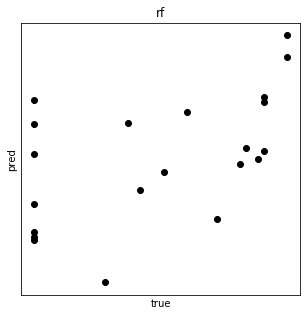

213.82110476190476
0.24877625276843907
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476]})
Mean squared error: 273.61
Coefficient of determination: 0.04


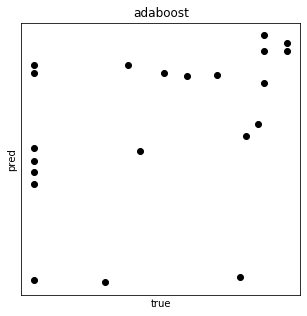

273.61457507038944
0.03870215893594964
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944]})
Mean squared error: 186.91
Coefficient of determination: 0.34


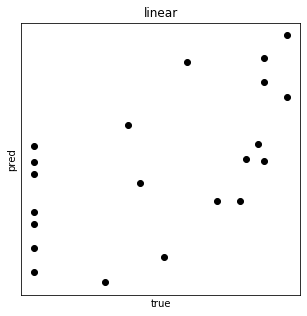

186.91075006684227
0.3433211645808907
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227]})
Mean squared error: 197.69
Coefficient of determination: 0.31


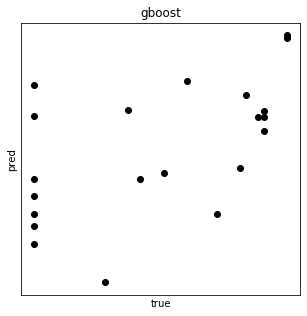

197.68845098928438
0.30545556248088457
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438]})
Mean squared error: 204.34
Coefficient of determination: 0.28


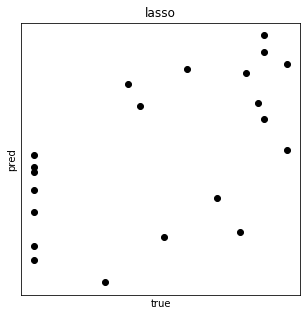

204.33958899018347
0.28208793084343065
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347]})
Mean squared error: 200.58
Coefficient of determination: 0.30


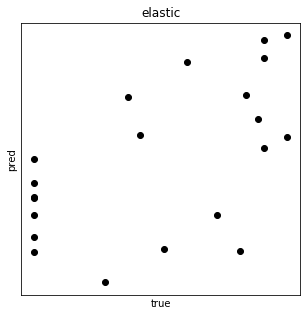

200.5773760754689
0.29530582010100404
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689]})
Mean squared error: 187.14
Coefficient of determination: 0.34


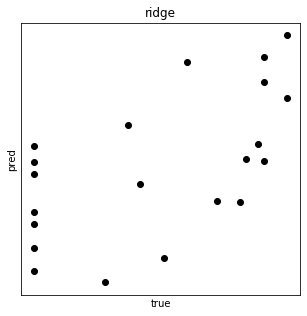

187.14313333525595
0.3425047258580338
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
fold=1
TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  17  18  19
  20  21  22  23  27  29  30  31  32  33  34  36  37  38  39  40  41  42
  43  44  45  47  48  49  50  51  52  53  54  55  57  58  59  60  61  62
  63  64  66  68  69  70  72  73  74  75  76  79  81  82  83  84  86  88
  89  91  93  94  95  97  98 100 101] TEST: [10 16 24 25 26 28 35 46 56 65 67 71 77 78 80 85 87 90 92 96 99]
Mean squared error: 147.20
Coefficient of determination: 0.46


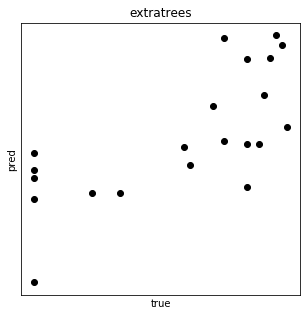

147.20063809523808
0.45741895488206485
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 179.04
Coefficient of determination: 0.34


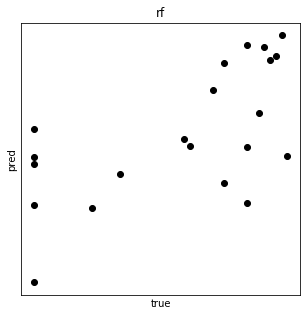

179.03508095238095
0.34007730813593884
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 176.63
Coefficient of determination: 0.35


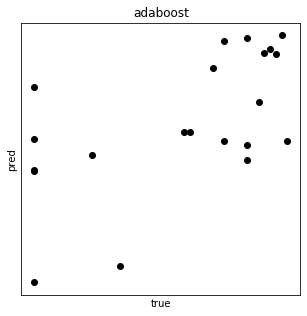

176.63408622874763
0.34892736641916955
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 204.55
Coefficient of determination: 0.25


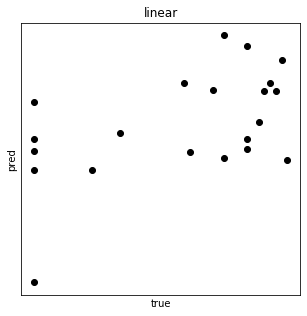

204.54883345327366
0.2460337042769788
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 300.13
Coefficient of determination: -0.11


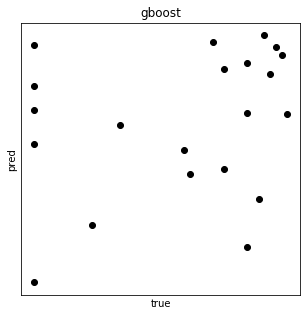

300.13386592362116
-0.10629239625145814
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 248.71
Coefficient of determination: 0.08


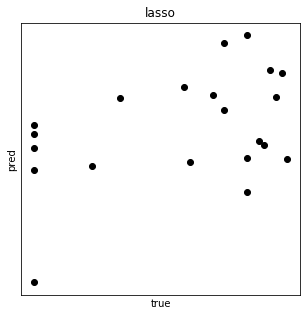

248.71431006040703
0.08323990959161909
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689], 'ridge': [187.14313333525595]})
Mean squared error: 215.59
Coefficient of determination: 0.21


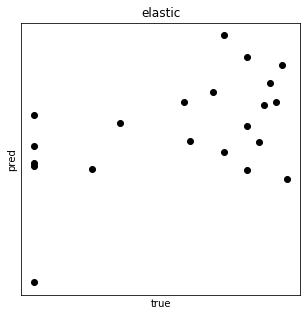

215.58669117955304
0.2053481987079545
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595]})
Mean squared error: 204.55
Coefficient of determination: 0.25


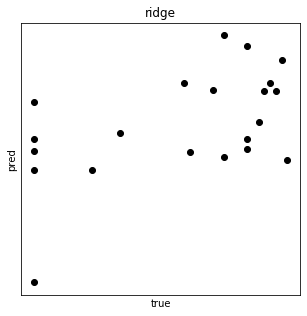

204.5544289216952
0.24601307939964567
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
fold=2
TRAIN: [  0   1   2   4   5   7   8  10  11  12  13  14  16  18  19  22  23  24
  25  26  27  28  29  30  31  33  34  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  54  55  56  57  58  59  60  64  65  66  67  69
  71  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  95  96  97  98  99 101] TEST: [  3   6   9  15  17  20  21  32  36  43  51  53  61  62  63  68  70  72
  94 100]
Mean squared error: 126.97
Coefficient of determination: 0.57


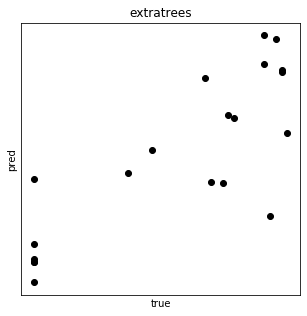

126.96831000000002
0.5656232979815258
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 138.26
Coefficient of determination: 0.53


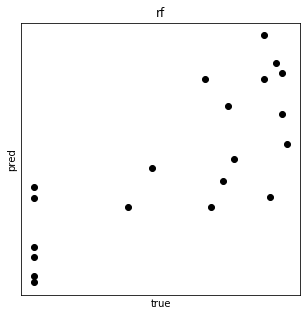

138.25755999999998
0.527001163188505
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 97.48
Coefficient of determination: 0.67


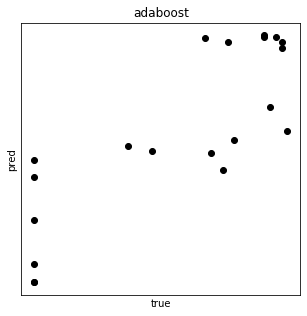

97.48332095430726
0.6664956518839984
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 102.22
Coefficient of determination: 0.65


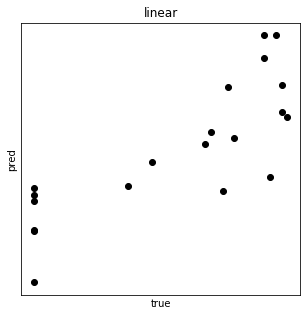

102.22373414548458
0.6502780220818181
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 200.07
Coefficient of determination: 0.32


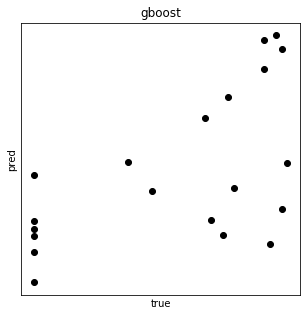

200.07112864509745
0.31552812642799366
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 127.37
Coefficient of determination: 0.56


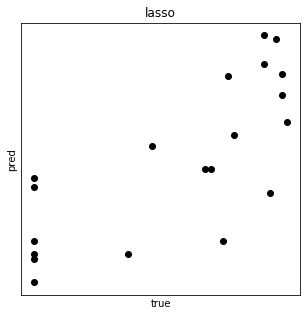

127.36766089427768
0.5642570616001448
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 143.08
Coefficient of determination: 0.51


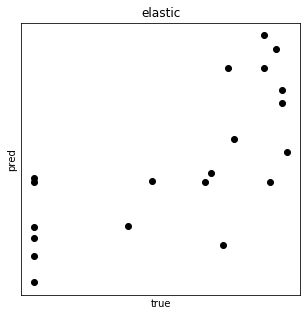

143.0849927123351
0.5104858271900955
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952]})
Mean squared error: 102.23
Coefficient of determination: 0.65


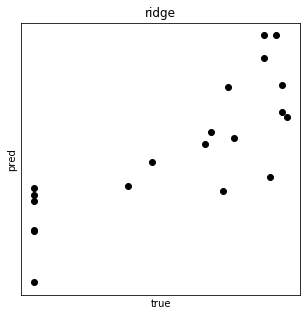

102.22809434741627
0.6502631052089761
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
fold=3
TRAIN: [  0   2   3   4   5   6   8   9  10  12  14  15  16  17  18  20  21  22
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  39  40  41  42
  43  44  45  46  49  50  51  53  54  55  56  57  61  62  63  64  65  67
  68  70  71  72  73  75  76  77  78  80  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  99 100 101] TEST: [ 1  

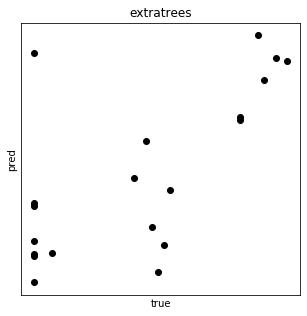

139.288685
0.45603106693743656
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 141.83
Coefficient of determination: 0.45


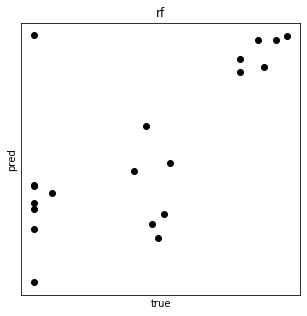

141.83390000000003
0.44609115051159864
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 174.95
Coefficient of determination: 0.32


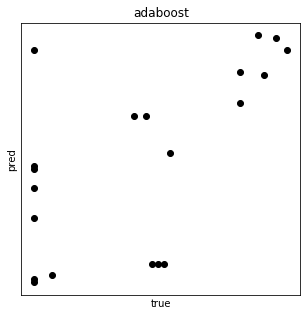

174.95424023215864
0.3167451369516572
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 153.18
Coefficient of determination: 0.40


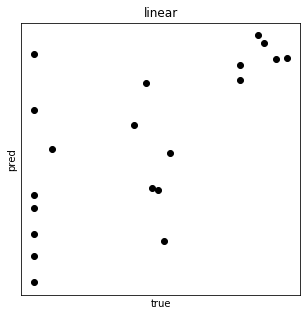

153.1831503510387
0.4017685294421671
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 168.13
Coefficient of determination: 0.34


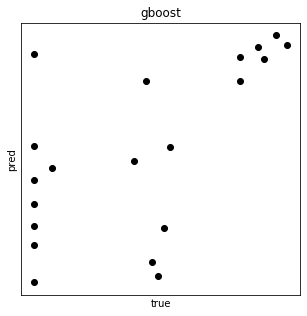

168.13190028406174
0.3433886577987122
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 165.14
Coefficient of determination: 0.36


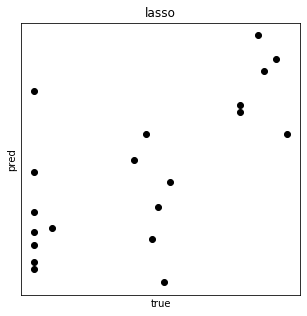

165.13627302717276
0.35508758483491076
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 186.81
Coefficient of determination: 0.27


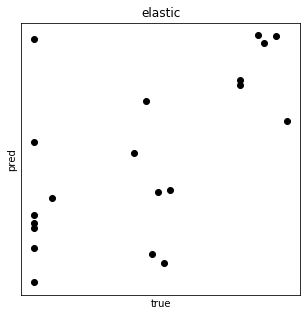

186.80654135537353
0.27045793425223175
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627]})
Mean squared error: 153.16
Coefficient of determination: 0.40


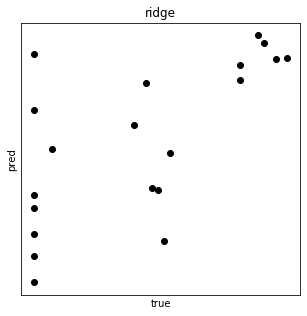

153.1646320851208
0.4018408494684027
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
fold=4
TRAIN: [  0   1   2   3   6   7   9  10  11  12  13  15  16  17  19  20  21  22
  23  24  25  26  28  30  31  32  33  35  36  37  38  42  43  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  

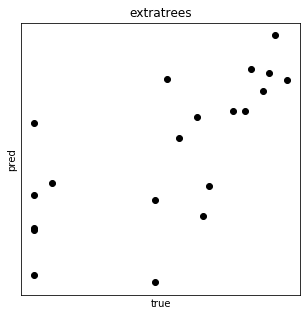

125.74522999999999
0.4599964356265568
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 144.33
Coefficient of determination: 0.38


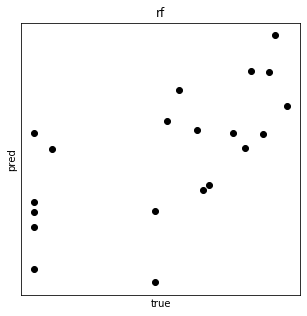

144.33331500000003
0.3801712831744395
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 162.78
Coefficient of determination: 0.30


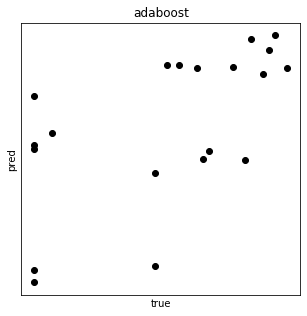

162.7792204098408
0.30095671042754957
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 177.19
Coefficient of determination: 0.24


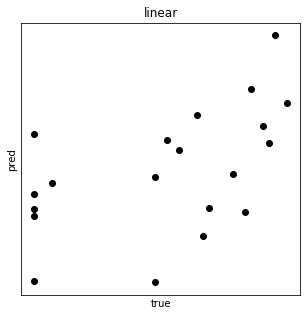

177.19423527363867
0.23905249818071506
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 168.83
Coefficient of determination: 0.27


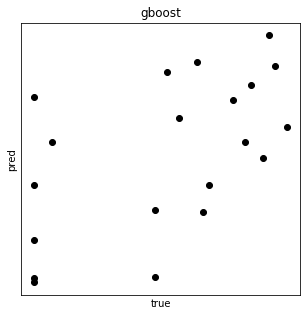

168.82818137997396
0.274979896160895
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174, 168.82818137997396], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 222.77
Coefficient of determination: 0.04


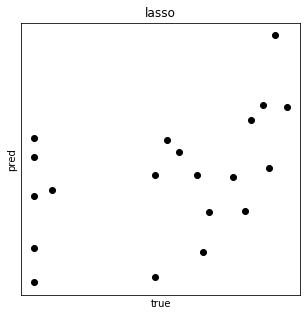

222.7670534323248
0.04334341049418189
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174, 168.82818137997396], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276, 222.7670534323248], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 245.52
Coefficient of determination: -0.05


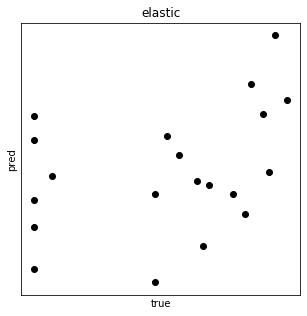

245.51916763747067
-0.05436385655531506
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174, 168.82818137997396], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276, 222.7670534323248], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353, 245.51916763747067], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208]})
Mean squared error: 177.34
Coefficient of determination: 0.24


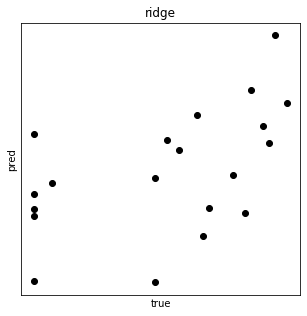

177.3424669349747
0.2384159283046693
defaultdict(<class 'list'>, {'extratrees': [181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], 'rf': [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], 'adaboost': [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], 'linear': [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], 'gboost': [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174, 168.82818137997396], 'lasso': [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276, 222.7670534323248], 'elastic': [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353, 245.51916763747067], 'ridge': [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208, 177.3424669349747]})


In [135]:
fold=0
mse = defaultdict(list)
r2 = defaultdict(list)

kf = KFold(n_splits=5, shuffle=True, random_state=22)
for train_index, test_index in kf.split(xa):
    print('fold='+str(fold))
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = xa[train_index], xa[test_index]
    y_train, y_test = ya[train_index], ya[test_index]
    for key in model_dict.keys():
        tmp_mse, tmp_r2 = model_eval(model_dict[key], key, X_train, X_test, y_train, y_test)
        print(tmp_mse)
        print(tmp_r2)
        mse[key].append(tmp_mse)
        r2[key].append(tmp_r2)
        print(mse)
    fold+=1

In [136]:
mse['extratrees']

[181.57926666666668,
 147.20063809523808,
 126.96831000000002,
 139.288685,
 125.74522999999999]

In [160]:
mse_means = []
r2_means = []
for key in mse.keys():
    print(key)
    print('MSE= '+ str(np.mean(mse[key])) +'+/-' + str(np.std(mse[key])))
    mse_means.append(np.mean(mse[key]))
    print('Rsq= '+ str(np.mean(r2[key])) +'+/-' + str(np.std(r2[key])) )
    r2_means.append(np.mean(r2[key]))

extratrees
MSE= 144.15642595238097+/-20.33634481939401
Rsq= 0.4602244343474151+/-0.0644549030092863
rf
MSE= 163.45619214285716+/-29.14620115646878
Rsq= 0.3884234315557842+/-0.09427208882796283
adaboost
MSE= 177.09308857908877+/-56.327230773645255
Rsq= 0.33436540492366484+/-0.19968270902001556
linear
MSE= 164.81214065805557+/-35.42093054824064
Rsq= 0.3760907837125139+/-0.15007076454870877
gboost
MSE= 206.97070544440777+/-48.53131732509255
Rsq= 0.2266119693234055+/-0.16788327082401505
lasso
MSE= 193.6649772808732+/-42.89645285428794
Rsq= 0.2656031794728574+/-0.1898046965955696
elastic
MSE= 198.31495379204023+/-33.8066899575071
Rsq= 0.24544678473919412+/-0.18157725202546382
ridge
MSE= 164.8865511248926+/-35.461335031175615
Rsq= 0.37580753764794556+/-0.15022364985088596


In [149]:
np.array(mse.values())

array(dict_values([[181.57926666666668, 147.20063809523808, 126.96831000000002, 139.288685, 125.74522999999999], [213.82110476190476, 179.03508095238095, 138.25755999999998, 141.83390000000003, 144.33331500000003], [273.61457507038944, 176.63408622874763, 97.48332095430726, 174.95424023215864, 162.7792204098408], [186.91075006684227, 204.54883345327366, 102.22373414548458, 153.1831503510387, 177.19423527363867], [197.68845098928438, 300.13386592362116, 200.07112864509745, 168.13190028406174, 168.82818137997396], [204.33958899018347, 248.71431006040703, 127.36766089427768, 165.13627302717276, 222.7670534323248], [200.5773760754689, 215.58669117955304, 143.0849927123351, 186.80654135537353, 245.51916763747067], [187.14313333525595, 204.5544289216952, 102.22809434741627, 153.1646320851208, 177.3424669349747]]),
      dtype=object)

In [161]:
### get numpy array from values
#y = np.zeros(len(mse))
mse_arr = np.zeros((len(mse), 5))
i = 0
for key, values in mse.items():
    #y[i] = key
    mse_arr[i, :] = values
    i += 1
    
r2_arr = np.zeros((len(r2), 5))
i = 0
for key, values in r2.items():
    #y[i] = key
    r2_arr[i, :] = values
    i += 1

In [164]:
mse_arr

array([[181.57926667, 147.2006381 , 126.96831   , 139.288685  ,
        125.74523   ],
       [213.82110476, 179.03508095, 138.25756   , 141.8339    ,
        144.333315  ],
       [273.61457507, 176.63408623,  97.48332095, 174.95424023,
        162.77922041],
       [186.91075007, 204.54883345, 102.22373415, 153.18315035,
        177.19423527],
       [197.68845099, 300.13386592, 200.07112865, 168.13190028,
        168.82818138],
       [204.33958899, 248.71431006, 127.36766089, 165.13627303,
        222.76705343],
       [200.57737608, 215.58669118, 143.08499271, 186.80654136,
        245.51916764],
       [187.14313334, 204.55442892, 102.22809435, 153.16463209,
        177.34246693]])

In [180]:
mse_hm = np.c_[mse_arr, mse_means]
r2_hm = np.c_[r2_arr, r2_means]

In [154]:
import seaborn as sns

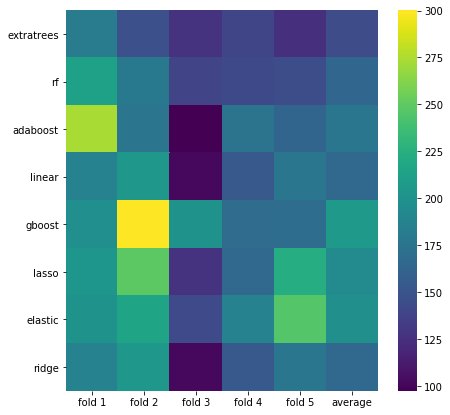

In [191]:
plt.rcParams['figure.figsize'] = 7,7
sns.heatmap(mse_hm, cmap='viridis',
            yticklabels=mse.keys(), 
            xticklabels=['fold 1','fold 2', 'fold 3' , 'fold 4', 'fold 5', 'average'])
plt.savefig('MSE_hm.svg')

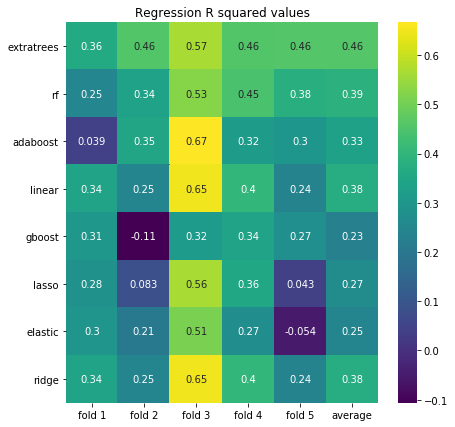

In [258]:
plt.rcParams['figure.figsize'] = 7,7
sns.heatmap(r2_hm, cmap='viridis',
            yticklabels=mse.keys(), annot=True,
            xticklabels=['fold 1','fold 2', 'fold 3' , 'fold 4', 'fold 5', 'average'])
plt.title('Regression R squared values')
plt.savefig('r2heatmap.png')

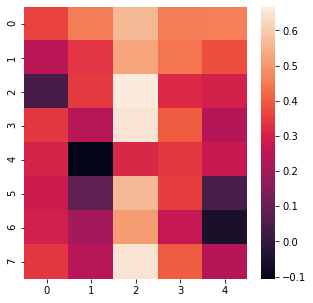

In [158]:
sns.heatmap(r2_arr)

In [140]:
np.array(mse['extratrees'],
        mse[''])

array([181.57926667, 147.2006381 , 126.96831   , 139.288685  ,
       125.74523   ])

In [57]:
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model

# Train with onlylipid data

In [243]:
# lipidomics data
dfl = df_dict['lipidomics']
dfl_covid = dfl[dfl['COVID']==1]
X = dfl_covid[dfl.columns[[is_int(x) for x in dfl.columns]]]
y = dfl_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [244]:

et = ExtraTreesRegressor(n_estimators = 2000,
                           max_depth=6,
                           n_jobs = -1,
                           random_state = 42)
et.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.92 
OOB Score: 0.43 
R^2 Validation Score: 0.31


(0, 45)

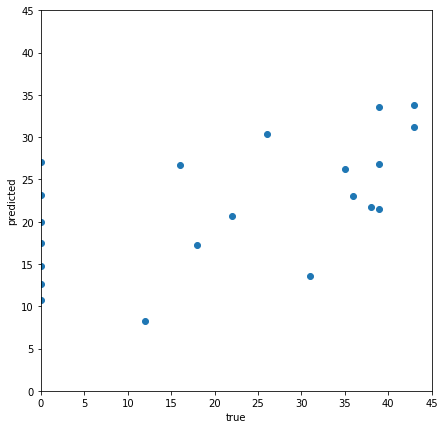

In [245]:
plt.scatter(y_valid, rf.predict(X_valid))
plt.xlabel("true")
plt.ylabel("predicted")
plt.xlim(0,45)
plt.ylim(0,45)

(0, 45)

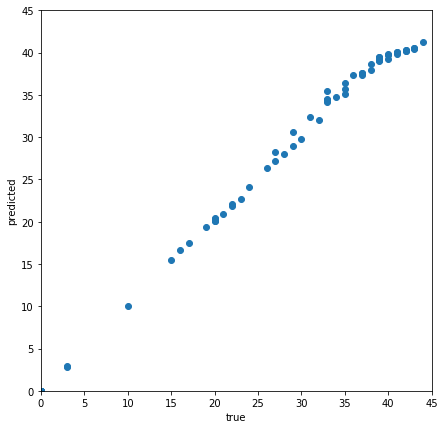

In [246]:
plt.scatter(y_train, et.predict(X_train))
plt.xlabel("true")
plt.ylabel("predicted")
plt.xlim(0,45)
plt.ylim(0,45)

In [247]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 31, 57, 83, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [248]:
np.where(y==0)

(array([  0,   7,   8,   9,  14,  21,  26,  27,  30,  31,  35,  42,  43,
         46,  47,  48,  49,  51,  53,  60,  74,  78,  79,  81,  90,  91,
         95,  97, 100, 101], dtype=int64),)

In [249]:
et = ExtraTreesRegressor()
et_randoml = RandomizedSearchCV(estimator = et, param_distributions = random_grid, 
                               n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_randoml.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 11.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False...
                   iid=

In [250]:
et_randoml.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

Model Performance
Average Error: 11.5248 days.
r2: 0.3842
MSE = 175.28 days.


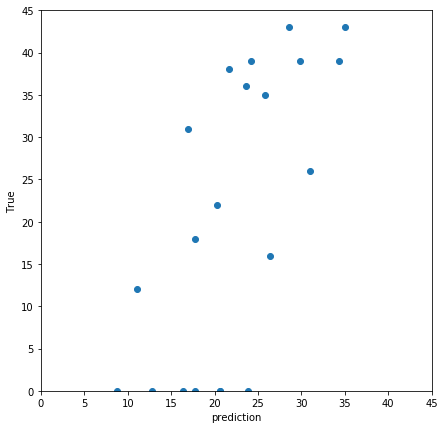

In [251]:
## evaluate base model
base_model = ExtraTreesRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid)

Model Performance
Average Error: 11.4946 days.
r2: 0.3819
MSE = 175.92 days.


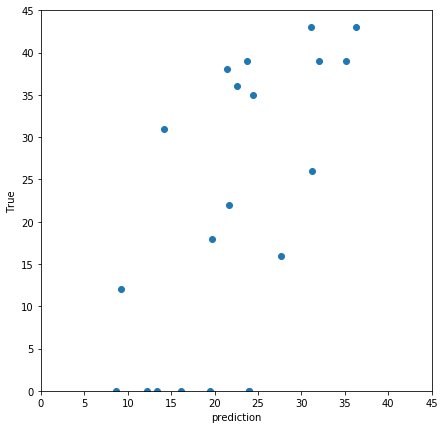

In [252]:
## best random search model
best_random_lip = et_randoml.best_estimator_
random_accuracy = evaluate(best_random_lip, X_valid, y_valid)

Model Performance
Average Error: 15.3956 days.
r2: -0.0079
MSE = 286.88 days.


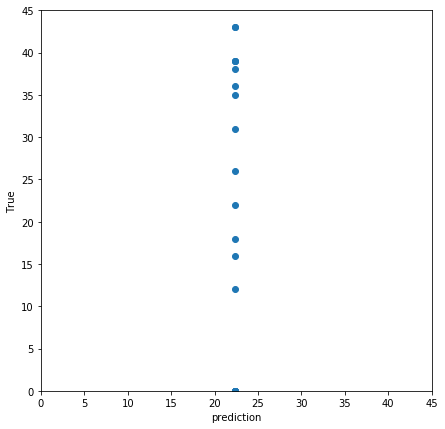

In [253]:
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)
dummy_accuracy = evaluate(dummy_model, X_valid, y_valid)

# Train proteins only

In [282]:
# proteomics data
dfp = df_dict['proteomics']
dfp_covid = dfp[dfp['COVID']==1]
X = dfp_covid[dfp.columns[[is_int(x) for x in dfp.columns]]]
y = dfp_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [283]:
et = ExtraTreesRegressor()
et_randomp = RandomizedSearchCV(estimator = et, param_distributions = random_grid, 
                               n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_randomp.fit(X_train, y_train)
print(et_randomp.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.2min finished


{'n_estimators': 650, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}


Model Performance
Average Error: 11.7071 days.
r2: 0.3026
MSE = 198.51 days.


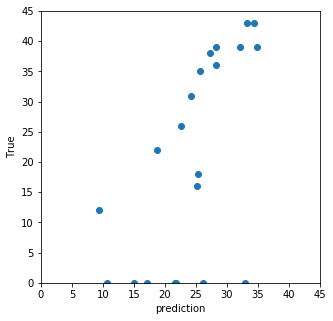

In [284]:
## evaluate base model
base_model = ExtraTreesRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid)

Model Performance
Average Error: 11.7674 days.
r2: 0.3172
MSE = 194.34 days.


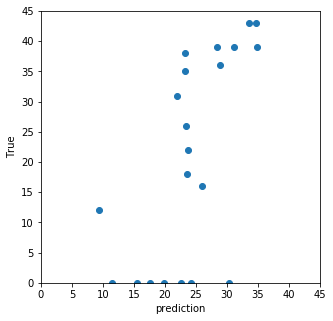

In [285]:
## best random search model
best_random_prot = et_randomp.best_estimator_
random_accuracy = evaluate(best_random_prot, X_valid, y_valid)

# Train metabolites only

In [239]:
# proteomics data
dfm = df_dict['metabolomics']
dfm_covid = dfm[dfm['COVID']==1]
X = dfm_covid[dfm.columns[[is_int(x) for x in dfm.columns]]]
y = dfm_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
et = ExtraTreesRegressor()
et_random_m = RandomizedSearchCV(estimator = et, param_distributions = random_grid, 
                               n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_random_m.fit(X_train, y_train)
print(et_random.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.9min finished


{'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 83, 'bootstrap': False}


Model Performance
Average Error: 13.8962 days.
r2: 0.0529
MSE = 269.58 days.


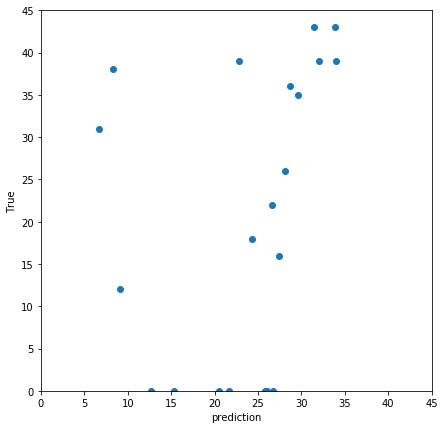

In [240]:
## evaluate base model
base_model = ExtraTreesRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid)

Model Performance
Average Error: 14.1319 days.
r2: 0.0349
MSE = 274.68 days.


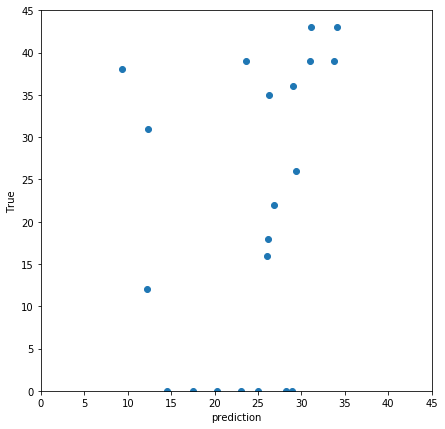

In [241]:
## best random search model
best_random_met = et_random_m.best_estimator_
random_accuracy = evaluate(best_random_met, X_valid, y_valid)

Model Performance
Average Error: 15.3956 days.
r2: -0.0079
MSE = 286.88 days.


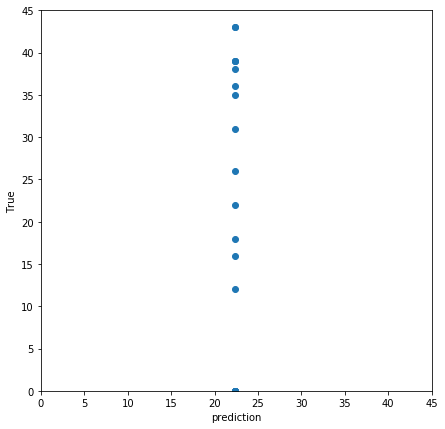

In [242]:
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)
dummy_accuracy = evaluate(dummy_model, X_valid, y_valid)

# train all data

In [254]:
# combined 
dfc = df_dict['combined']
dfc_covid = dfc[dfc['COVID']==1]
X = dfc_covid[dfc.columns[[is_int(x) for x in dfc.columns]]]
y = dfc_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
print('shape X train'+str(X_train.shape))
print('shape X valid'+str(X_valid.shape))
et = ExtraTreesRegressor()
et_randomc = RandomizedSearchCV(estimator = et,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 4, verbose=2,
                               random_state=42,
                               n_jobs = -1)
et_randomc.fit(X_train, y_train)
print(et_randomc.best_params_)

shape X train(81, 4029)
shape X valid(21, 4029)
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 12.2min finished


{'n_estimators': 650, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}


Model Performance
Average Error: 10.9357 days.
r2: 0.4594
MSE = 153.87 days.


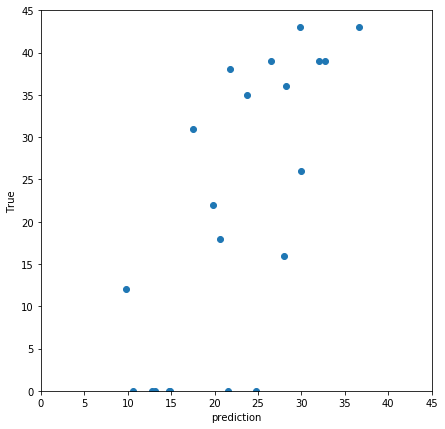

In [255]:
## evaluate base model
base_model = ExtraTreesRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid)

Model Performance
Average Error: 11.4213 days.
r2: 0.3971
MSE = 171.62 days.


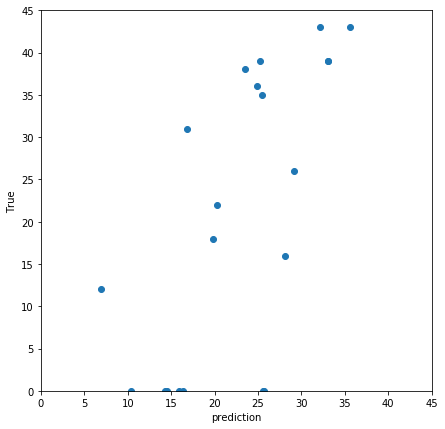

In [259]:
## best random search model
best_random_c = et_randomc.best_estimator_
random_accuracy = evaluate(best_random_c, X_valid, y_valid)

# make nice plots of the correlations

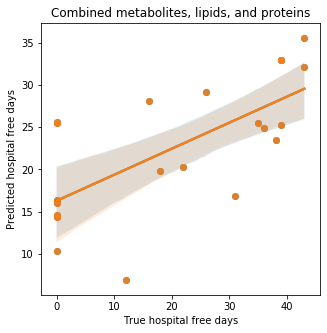

0.3970508821308173


In [299]:
X = dfc_covid[dfc.columns[[is_int(x) for x in dfc.columns]]]
y = dfc_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
ypred= best_random_c.predict(X_valid)
plt.rcParams['figure.figsize'] =5,5
sns.regplot(y_valid, ypred)
plt.xlabel('True hospital free days')
plt.ylabel('Predicted hospital free days')
plt.title('Combined metabolites, lipids, and proteins')
plt.show()
print(r2_score(y_valid, ypred))

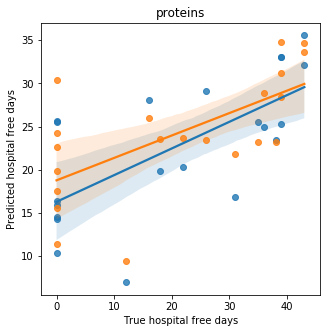

0.3172346830374032


In [297]:
X = dfp_covid[dfp.columns[[is_int(x) for x in dfp.columns]]]
y = dfp_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
ypred= best_random_prot.predict(X_valid)
plt.rcParams['figure.figsize'] =5,5
sns.regplot(y_valid, ypred)
plt.xlabel('True hospital free days')
plt.ylabel('Predicted hospital free days')
plt.title('proteins')
plt.show()
print(r2_score(y_valid, ypred))

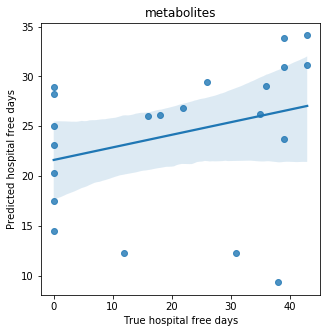

0.034946822441492276


In [293]:
X = dfm_covid[dfm.columns[[is_int(x) for x in dfm.columns]]]
y = dfm_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
ypred = best_random_met.predict(X_valid)

plt.rcParams['figure.figsize'] =5,5
sns.regplot(y_valid, ypred)
plt.xlabel('True hospital free days')
plt.ylabel('Predicted hospital free days')
plt.title('metabolites')
plt.show()
print(r2_score(y_valid, ypred))

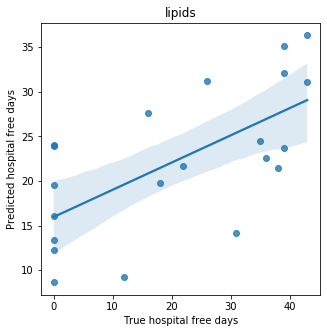

0.3819391335283856


In [292]:
X = dfl_covid[dfl.columns[[is_int(x) for x in dfl.columns]]]
y = dfl_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 22)
ypred = best_random_lip.predict(X_valid)

plt.rcParams['figure.figsize'] =5,5
sns.regplot(y_valid, ypred)
plt.xlabel('True hospital free days')
plt.ylabel('Predicted hospital free days')
plt.title('lipids')
plt.show()
print(r2_score(y_valid, ypred))


In [300]:
best_random_c.feature_importances_

array([6.20024148e-05, 9.33976715e-05, 7.74109103e-06, ...,
       5.02454163e-05, 8.50242504e-06, 1.58086599e-05])

In [302]:
importances = best_random_c.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_random_c.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [303]:
indices

array([ 370,  150,  261, ...,  634, 2873, 3283], dtype=int64)

In [336]:
X = dfc_covid[dfc.columns[[is_int(x) for x in dfc.columns]]]
y = dfc_covid['Hospital_free_days_45']

In [314]:
prot_name_dict = covid_data.get_biomolecule_names()

In [315]:
lip_name_dict = covid_data.get_biomolecule_names(dataset='lipidomics')

In [316]:
met_name_dict = covid_data.get_biomolecule_names(dataset='metabolomics')

In [317]:
def Merge_dict(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 

In [318]:
combined1 = Merge_dict(prot_name_dict, lip_name_dict)

In [319]:
combined2 = Merge_dict(combined1, met_name_dict)


In [331]:
feature_names_ordered = [combined2[x] for x in dfc.columns[indices]]

In [339]:
number_column_names = dfc.columns[[is_int(x) for x in dfc.columns]].values

In [340]:
feature_names = [combined2[x] for x in number_column_names]

In [ ]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [342]:
import pandas as pd

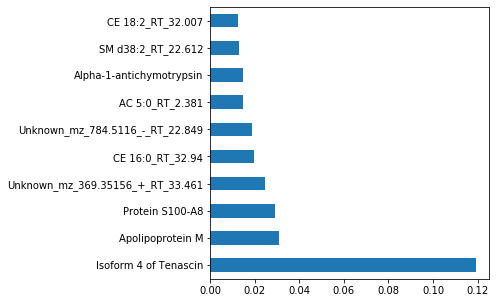

In [344]:
(pd.Series(best_random_c.feature_importances_, index=feature_names)
   .nlargest(10)
   .plot(kind='barh')) 

In [322]:
X.shape[1]

4029

In [326]:
importances

array([6.20024148e-05, 9.33976715e-05, 7.74109103e-06, ...,
       5.02454163e-05, 8.50242504e-06, 1.58086599e-05])

In [327]:
indices[0]

370

Feature ranking:
1. feature 370 (0.119332)
2. feature 150 (0.030773)
3. feature 261 (0.028998)
4. feature 3793 (0.024703)
5. feature 3764 (0.019801)
6. feature 2497 (0.018561)
7. feature 747 (0.014780)
8. feature 172 (0.014768)
9. feature 2440 (0.012845)
10. feature 3689 (0.012629)


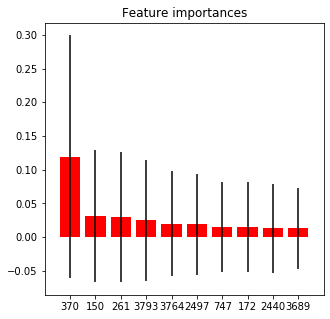

In [325]:
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, [indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][0:10],
        color="r", yerr=std[indices][0:10], align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [250]:
dfc = df_dict['combined']

In [251]:
nonzero = (dfc['Hospital_free_days_45']!=0)

In [247]:
nonzero.values

array([False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [253]:
dfc_non0 = dfc[nonzero.values]

In [254]:
dfc0_covid = dfc_non0[dfc_non0['COVID']==1]

In [256]:
dfc0_covid

,7593,7596,7597,7599,7600,7601,7602,7605,7606,7607,...,Vent_free_days,DM,Hospital_free_days_45,Ferritin_NG/ML,CRP_MG/L,DDIMER_mg/L_FEU,Procalcitonin_NG/ML,Lactate_MMol/L,Fibrinogen,SOFA
sample_id,,,,,,,,,,,,,,,,,,,,,
2.0,37.353091,29.419228,29.048510,27.573331,24.671039,22.343591,27.166913,29.576452,30.081443,29.514012,...,28,0,39,1060,,1.03,0.37,,,
3.0,37.527875,27.174171,28.953215,25.619161,24.528623,20.714471,25.589237,29.621968,29.398338,29.436129,...,28,1,18,1335,53.2,1.48,0.07,,513,
4.0,37.673128,28.879702,29.527460,23.893562,25.875326,24.170967,25.280226,30.966780,30.360452,30.041791,...,28,0,39,583,251.1,1.32,0.98,0.87,949,
5.0,37.983542,27.262485,28.605867,18.440251,20.888495,17.354782,25.654472,29.020542,29.175695,29.628988,...,23,0,27,800,355.8,0.69,4.92,1.48,929,7
6.0,37.489959,29.535232,29.251895,25.033513,26.576723,25.044144,27.201630,30.070352,31.190664,30.745911,...,28,0,36,563,129.1,,0.67,0.86,769,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,38.025760,27.909764,29.292547,19.582291,24.774145,23.696679,25.085698,30.882708,29.568374,30.343821,...,28,1,33,386,193.6,1.3,,,752,
96.0,36.704965,28.605549,25.719967,23.779666,26.306052,22.671805,25.526087,31.268075,29.748808,30.919969,...,28,1,41,,,,,,,
98.0,37.605885,29.348514,30.065610,25.341469,24.728426,24.685761,25.236846,30.618944,31.558692,29.998600,...,28,1,15,582,108.6,1.54,0.36,3.28,468,


In [260]:
len(np.where(dfc['Hospital_free_days_45']==0)[0])

34

In [267]:
# combined 

X = dfc0_covid[dfc.columns[[is_int(x) for x in dfc.columns]]]
y = dfc0_covid['Hospital_free_days_45']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 420)
print('shape X train'+str(X_train.shape))
print('shape X valid'+str(X_valid.shape))


shape X train(64, 4029)
shape X valid(8, 4029)


(array([ 2.,  1.,  2.,  5.,  9.,  5.,  6., 10., 16., 16.]),
 array([ 3. ,  7.1, 11.2, 15.3, 19.4, 23.5, 27.6, 31.7, 35.8, 39.9, 44. ]),
 <a list of 10 Patch objects>)

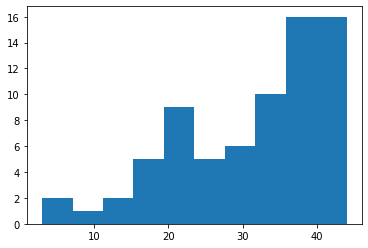

In [268]:
plt.hist(y)

In [273]:

rf = RandomForestRegressor(n_estimators = 1000,
                           max_depth=None,
                           n_jobs = -1, min_samples_leaf=1, min_samples_split=2,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.92 
OOB Score: 0.43 
R^2 Validation Score: 0.40


Model Performance
Average Error: 4.8098 days.
Accuracy = 82.89%.


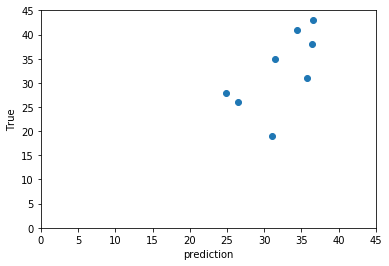

In [274]:
## best random search model
random_accuracy = evaluate(rf, X_valid, y_valid)

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2,
                               random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)